# Requirement 1a

## Backpropagation algorithm

For a neuron in a layer $r$:
$$y_{i \mu }^{(r)} = f(\sum_{k}w_{ij}^{(r)}y_{i\mu}^{(r-1)})$$ where $f$: activation function of the neuron.

After calculating the cost function $E=\frac{1}{2}\sum_{k\mu}(e_{k\mu})^2$ we backpropagate through the network. We start the calculations at the output layer $R$ and backpropagate to the previous layers using the following relations:

$$\delta_{i\mu}^{(R)} = f'(\nu_{i\mu}^{(R)})(y_{i\mu}^{(R)}-T_{i\mu})$$
$$\delta_{i\mu}^{(r)} = \sum_{k} \delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}f'(\nu_{i\mu}^{(r)})$$

Then, we update the weights by:
$$w_{ij}^{(r)}(new)=w_{ij}^{(r)}(old)+\delta w_{ij}^{(r)}, \delta w_{ij}^{(r)}=-ϵ \sum_{\mu}\delta_{i\mu}^{(r)}y_{j\mu}^{(r-1)}$$


We will examine what happens to the backpropagation equations if we decide to use different activation functions.

* ReLU function

  $
  ReLU(x)=max(0,x)=
  \begin{cases}
  0, x\leq0\\
  x, x> 0\\
  \end{cases}$
  $\rightarrow $
  $ReLU'(x)=
  \begin{cases}
  0, x\leq0\\
  1, x> 0\\
  \end{cases}
  =H(x)$, where $H(x)$ is the Heaviside/unit step function.

  Thus, using the ReLU function, the backpropagation equations can be written as:

  $$\delta_{i\mu}^{(R)} =\begin{cases}
  0,\nu_{i\mu}^{(R)}\leq 0\\
  (y_{i\mu}^{(R)}-T_{i\mu}), \nu_{i\mu}^{(R)}>0
  \end{cases}$$


  $$\delta_{i\mu}^{(r)} = \sum_{k} term(k,\mu,i,r), \text{ where } term(k,\mu,i,r)=\begin{cases}
  0,\nu_{i\mu}^{(r)}\leq 0\\
  \delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}, \nu_{i\mu}^{(r)}>0
  \end{cases}$$

* Hyperbolic tangent $tanh$

  $tanh(x)=\frac{sinh(x)}{cosh(x)}=\frac{e^x-e^{-x}}{e^x+e^{-x}} \rightarrow tanh(x)'=\frac{(e^x+e^{-x})(e^x+e^{-x})-(e^x-e^{-x})(e^x-e^{-x})}{(e^x+e^{-x})^2}=1-\frac{(e^x-e^{-x})^2}{(e^x+e^{-x})^2}=1-(tanh(x))^2$

  The backpropagation equations are transformed to:
  $$\delta_{i\mu}^{(R)} = (1-(tanh(\nu_{i\mu}^{(R)}))^2)(y_{i\mu}^{(R)}-T_{i\mu})$$
  $$\delta_{i\mu}^{(r)} = \sum_{k} \delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}(1-(tanh(\nu_{i\mu}^{(r)}))^2)$$


* Sigmoid function 

  $sigm(x)=\frac{1}{1+e^{-x}}\rightarrow sigm(x)'=\frac{-(-e^{-x})}{(1+e^{-x})^2}=\frac{1}{1+e^{-x}}\frac{e^{-x}}{1+e^{-x}}=\frac{1}{1+e^{-x}}\frac{1+e^{-x} -1}{1+e^{-x}}=\frac{1}{1+e^{-x}}(1-\frac{1}{1+e^{-x}})=sigm(x)(1-sigm(x))$

  The backpropagation equations are transformed to:
  $$\delta_{i\mu}^{(R)} = sigm(\nu_{i\mu}^{(R)})(1-sigm(\nu_{i\mu}^{(R)}))(y_{i\mu}^{(R)}-T_{i\mu})$$
  $$\delta_{i\mu}^{(r)} = \sum_{k} \delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}sigm(\nu_{i\mu}^{(r)})(1-sigm((\nu_{i\mu}^{(r)})))$$






## Range of gradients

From the plots below and by doing the calculations by hand, the range of the gradients of each function are:
* ReLU: $[0,+\infty]$
* sigmoid: $[0.00, 0.25]$

  $(sigm(x))''=(sigm(x)(1-sigm(x)))'=(sigm(x)-(sigm(x))^2)'=(sigm(x))'-2sigm(x)(sigm(x))'=(sigm(x))'(1-2sigm(x))=sigm(x)(1-sigm(x))(1-2sigm(x)) \rightarrow  (sigm(x_0))''=0\rightarrow sigm(x_0)=1/2 \rightarrow x_0=0 $ which turns to be the maximum of the derivative of the sigmoid function. We can confirm the previous statement if we calculate the third 
derivative and obtain the value at $x_0$, which will turb.

  At $x_0=0 \rightarrow (sigm(x_0))'=sigm(x_0)(1-sigm(x_0))=\frac{1}{4}$ and $lim_{x\rightarrow \pm \infty}(sigm(x))'=0$. Thus, the range of gradients turns out to be the interval $[0.00, 0.25]$.


* $tanh$: $[0.00, 1.00]$

  $(tanh(x))''=(1-(tanh(x))^2)'=-2tanh(x)(tanh(x))'=-2tanh(x)(1-(tanh(x))^2) \rightarrow (tanh(x_0))''=0 \rightarrow tanh(x_0)=0 \rightarrow x_0=0$ which turns to be the maximum of the derivative, as before. 

  At $x_0=0 \rightarrow (tanh(x_0))'=1-tanh(x_0)^2=1$, $lim_{x\rightarrow \pm \infty}(tanh(x))'=0$ and the range of gradients is the interval $[0.00, 1.00]$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

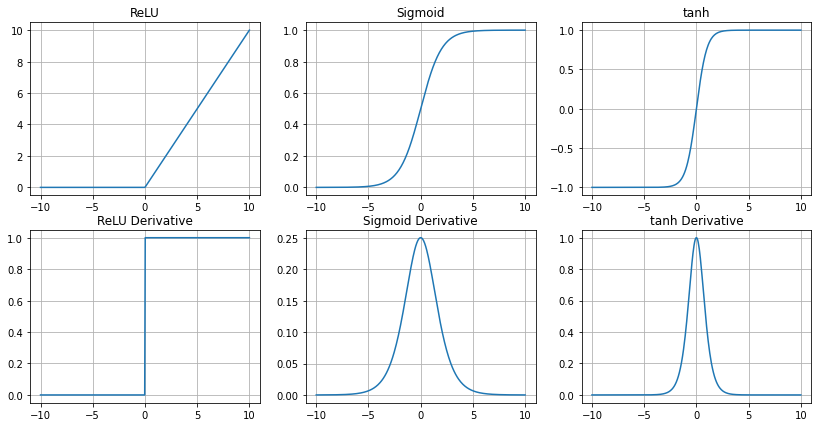

In [ ]:
# Plots of all the activation functions and their derivatives.

x = np.linspace(-10, 10, 400)

relu = np.maximum(0, x)
sigm = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

relu_der = np.heaviside(x, 1)
sigm_der = sigm*(1-sigm)
tanh_der = 1-np.square(tanh)


fig, axs = plt.subplots(2, 3, figsize=(14,7))
axs[0,0].plot(x, relu)
axs[0,1].plot(x, sigm)
axs[0,2].plot(x, tanh)

axs[1,0].plot(x, relu_der)
axs[1,1].plot(x, sigm_der)
axs[1,2].plot(x, tanh_der)

axs[0,0].title.set_text('ReLU')
axs[0,1].title.set_text('Sigmoid')
axs[0,2].title.set_text('tanh')

axs[1,0].title.set_text('ReLU Derivative')
axs[1,1].title.set_text('Sigmoid Derivative')
axs[1,2].title.set_text('tanh Derivative')

for i in range(0,2):
  for j in range(0,3):
    axs[i,j].grid()